/tmp/ipykernel_3072851/1517450107.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  folder_data = pd.concat(all_data, ignore_index=True)


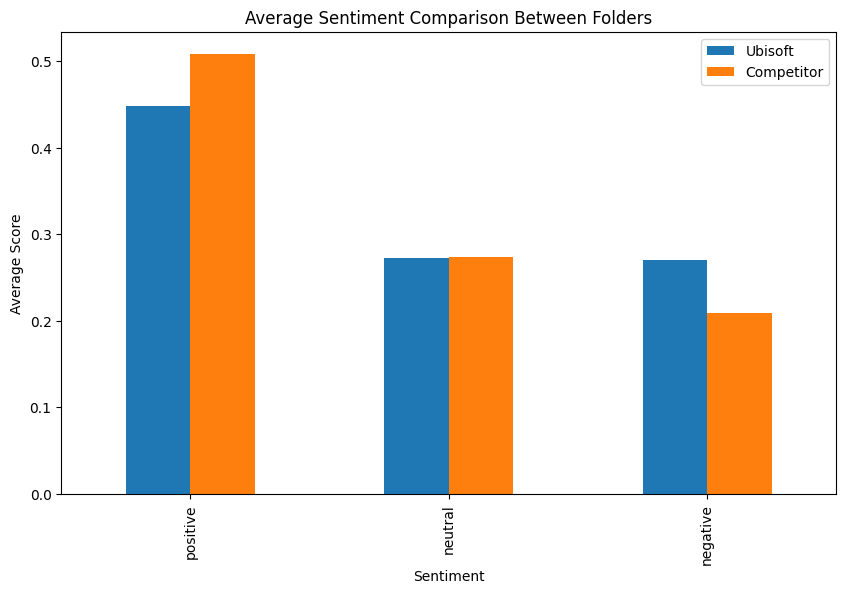

In [1]:
import os
import pandas as pd
import ast
import re
import matplotlib.pyplot as plt

# Function to clean and parse the 'sentiments' column
def clean_and_parse_sentiment(sentiment_str):
    cleaned_str = re.sub(r'np\.float32\(([\d\.]+)\)', r'\1', sentiment_str)
    return ast.literal_eval(cleaned_str)

# Function to load and process all CSV files in a folder
def process_folder(folder_path):
    all_data = []
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            # Load the CSV file
            data = pd.read_csv(os.path.join(folder_path, file), low_memory=False)
            print(f"Reading {os.path.join(folder_path, file)}")

            # Clean and parse the sentiments column
            data['sentiments'] = data['sentiment'].apply(lambda x: clean_and_parse_sentiment(x) if isinstance(x, str) else x)
            
            # Extract individual sentiment scores
            data['positive'] = data['sentiments'].apply(lambda x: x.get('positive', 0))
            data['neutral'] = data['sentiments'].apply(lambda x: x.get('neutral', 0))
            data['negative'] = data['sentiments'].apply(lambda x: x.get('negative', 0))
            
            # Append to the list
            all_data.append(data[['positive', 'neutral', 'negative']])
    
    # Concatenate all files in the folder into a single DataFrame
    folder_data = pd.concat(all_data, ignore_index=True)
    return folder_data

# Load and process data from both folders
folder1_data = process_folder('reviews-ubisoft')
folder2_data = process_folder('reviews-comp')

# Calculate average sentiment scores for each folder
folder1_avg = folder1_data.mean()
folder2_avg = folder2_data.mean()

# Prepare data for comparison plot
comparison_df = pd.DataFrame({
    'Ubisoft': folder1_avg,
    'Competitor': folder2_avg
})

# Plotting the comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.title('Average Sentiment Comparison Between Folders')
plt.show()
